# Using Python and Jupyter to analyze data

This repo should teach you to use Jupyter notebooks as a analysis and visualization framework. 

## Contents

- [Getting Started](#Getting-started)
- [Hello Python](#Hello-Python)
- [Hello Jupyter](#Hello-Jupyter)
- [Hello Data](#Hello-Data)
- [Hello Charts](#Hello-Charts)
- [Hello Maps!](#Hello-maps!)
- [Useful Links](#Useful-links)


## Getting started

There are a number of ways to [install Jupyter](http://jupyter.readthedocs.io/en/latest/install.html), the most recommended being by using [Anaconda](https://www.continuum.io/downloads). I've never used Anaconda and find it easier to install with [Pip](https://pypi.python.org/pypi/pip) (A package manager for Python, think Python's `npm`,) preferably in a virtual environment. I like to use [Virtualenvwrapper](https://virtualenvwrapper.readthedocs.io/en/latest/).


```bash
$ mkvirtualenv jupyter-skillshare
(jupyter-skillshare) $
```

The parentheses indicate that you're inside your virtualenv. If you need to exit the environment, you can type `deactivate`. To re-enter the virtual environment, type `workon jupyter-skillshare` (or whatever the name of your environment.)


When you have your virtual env ready, clone the repo:

```bash
(jupyter-skillshare) $ git clone git@github.com:WPMedia/gfx-jupyter-skillshare.git jupyter-skillshare
```

Then use pip to install the requirements listed in requirements.txt (this may take a while)

```bash
(jupyter-skillshare) $ pip install -r requirements.txt
```

To boot up a notebook, type `jupyter notebook`

```bash
(jupyter-skillshare) $ jupyter notebook
```

Previously, this would've automatically opened up a browser window, but looks like there's a bug with the latest version of OSX. Open your notebook by going to [localhost:8888](http://localhost:8888)

## Or, a quicker method

Ben Welsh has a notebook server set up for his ["First Python Notebook"](http://www.firstpythonnotebook.org/) MOOC through the California Civic Data Coalition, and has kindly offered it for this skillshare. If you don't feel like going through the setup/install process, you can start up a server at http://notebooks.californiacivicdata.org/ (you'll need to sign in and authorize GitHub to use the server.) 

If you're interested in Python/Jupyter, you should take a look at that course. It's much more in-depth and gives you a much better idea of what's possible with Jupyter notebooks. 

After running `jupyter notebook` and going to localhost:8888 you should see a page that looks similar to this 

![Jupyter notebook homepage](img/jupyter_homepage.png)

Click the `New` button to create a new Python notebook. You should see something like this, a mostly empty screen with one cell for text:

![Empty notebook](img/empty_notebook.png)

## Hello Python

You can execute any python code in notebooks. The rendered output will appear below your current cell. If you need a starter on Python, [there's a notebook for that](https://notebooks.azure.com/Microsoft/libraries/samples/html/Introduction%20to%20Python.ipynb). 

In [3]:
print "hello" + " world!"

hello world!


In [4]:
2 + 2


4

In [10]:
for i in range(0, 5):
    print i
    

0
1
2
3
4


Like Python in the interpreter or a script, undefined variables and syntax errors will throw errors. 

In [8]:
2 + undefined_variable

NameError: name 'undefined_variable' is not defined

In [ ]:
for i in range(0,10)
    print i

## Hello Jupyter

You may notice that our code is broken up into little snippets, or "cells." Think of each cell as being broken up into a statement. And because they're reorganizeable (you can cut, paste, and shift cells up and down,) it's good for legibility and your sanity to keep statements short. 

You might also notice that we're mixing "code" cells with Markdown cells. This lets you keep detailed notes and documentation on your work as you go - more detailed than regular inline comments you might use in your code.

Python not your thing? You can install other language kernels to use with the notebook app, including [IRKernel](https://irkernel.github.io/) for R, or [IJavaScript](https://github.com/n-riesco/ijavascript) for JavaScript. You can see the [full list of kernels](https://github.com/jupyter/jupyter/wiki/Jupyter-kernels) available. 

And here are some instructions for [installing and running](https://www.datacamp.com/community/blog/jupyter-notebook-r#gs.6ggEhYw) an R kernel. 

### Some handy shortcuts

`enter` - Enter cell edit mode

`escape` - Enter command mode

`shift-enter` - Run the cell

`a` - Create cell above

`b` - Create cell below

`j` - Move to cell below

`k` - Move to cell above

`m` - Convert cell to Markdown

`y` - Convert cell to code 

`s` - Save notebook

## Hello Data 

Let's read in some data. We'll use data from MLB's [Statcast](https://baseballsavant.mlb.com/statcast_search). `data/nationals_pitch_data.csv` contains every pitch thrown by Washington Nationals pitchers this season. 

We'll read in the CSV as a [Pandas](http://pandas.pydata.org/pandas-docs/stable/) data frame. If you're familiar with data frames in R, you'll find that these work very simliarly. 

First, we need to import Pandas. We'll use a common alias so it's not so clunky to type. Usually this would happen at the top of a notebook but doing it here to illustrate the process.

In [12]:
import pandas as pd

Note that a little asterisk briefly appears in the brackets next to the cell, and then (hopefully) is replaced by a number. This means the code in the cell is running. 

We can read in the module using `read_csv`. Note that we add `na_values="null"` because that is how NA values are included in the CSV. Otherwise, the cell values would be the string "null". 

In [34]:
df = pd.read_csv('data/nationals_pitch_data.csv', na_values="null")

### Summarizing data

There are a number of data summary functions we can use. First, check out the data using `head`.

In [35]:
df.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number
0,SL,2017-06-25,79.8,2.6252,5.2493,Oliver Perez,458015,424144,strikeout,swinging_strike,...,54.8085,0.0,0.0,0.0,1.0,0.0,0.0,NaN,72,6
1,SI,2017-06-25,93.1,2.7662,5.3738,Oliver Perez,458015,424144,NaN,ball,...,53.9725,0.0,0.0,NaN,NaN,NaN,NaN,NaN,72,5
2,SL,2017-06-25,79.5,2.6793,5.1894,Oliver Perez,458015,424144,NaN,swinging_strike,...,54.8107,0.0,0.0,NaN,NaN,NaN,NaN,NaN,72,4
3,FF,2017-06-25,90.9,2.6775,5.4827,Oliver Perez,458015,424144,NaN,ball,...,54.4177,0.0,0.0,NaN,NaN,NaN,NaN,NaN,72,3
4,SI,2017-06-25,91.1,2.4475,5.3219,Oliver Perez,458015,424144,NaN,called_strike,...,54.2785,0.0,0.0,NaN,NaN,NaN,NaN,NaN,72,2


You can also see how many rows and columns are in the data with shape. We have data on more than 11,000 pitches, and 78 columns.  

In [36]:
df.shape

(11320, 78)

Another important command is `dtypes`, which provides the type of value in a column. "Object" is basically a string. 

In [258]:
df.dtypes

pitch_type                          object
game_date                           object
release_speed                      float64
release_pos_x                      float64
release_pos_z                      float64
player_name                         object
batter                               int64
pitcher                              int64
events                              object
description                         object
spin_dir                           float64
spin_rate_deprecated               float64
break_angle_deprecated             float64
break_length_deprecated            float64
zone                               float64
des                                 object
game_type                           object
stand                               object
p_throws                            object
home_team                           object
away_team                           object
type                                object
hit_location                       float64
bb_type    

You can also use `describe` to get an overview of data in a column. I find this easiest to read when summarising one or two columns at a time. This provides summary info like min/max, mean, count, standard deviation and percentile break points.

In [259]:
df['release_speed'].describe()

count    11091.000000
mean        89.453485
std          5.930706
min         70.300000
25%         85.400000
50%         90.700000
75%         94.000000
max        101.500000
Name: release_speed, dtype: float64

For a column with string values, this will give the number of unique values, as well as the most frequent value in the list. It looks like Tanner Roark has thrown the most pitches this season. 

In [260]:
df['player_name'].describe()

count            11320
unique              18
top       Tanner Roark
freq              1662
Name: player_name, dtype: object

### Grouping and filtering

Let's group these by pitcher. We can group using one or more columns, or a function, but in this case let's just use the "player_name" column.

In [261]:
by_pitcher = df.groupby(['player_name'])

Now you can see how many items are in each column, kind of like a pivot table. It's important though to remember that each of these contain a reference to that subset of the table. `.size()` gives us a "series" (basically a list of values) with counts of how many times the the pitchers appear in the table. 

In [262]:
by_pitcher.size()

player_name
A.J. Cole             109
Blake Treinen         520
Enny Romero           642
Gio Gonzalez         1581
Jacob Turner          558
Jeremy Guthrie         47
Joe Blanton           363
Joe Ross              939
Koda Glover           317
Matt Albers           437
Matt Grace            172
Max Scherzer         1617
Oliver Perez          293
Sammy Solis            72
Shawn Kelley          361
Stephen Strasburg    1568
Tanner Roark         1662
Trevor Gott            62
dtype: int64

It's easier to read if we sort it. 

In [263]:
by_pitcher.size().sort_values(ascending=False)

player_name
Tanner Roark         1662
Max Scherzer         1617
Gio Gonzalez         1581
Stephen Strasburg    1568
Joe Ross              939
Enny Romero           642
Jacob Turner          558
Blake Treinen         520
Matt Albers           437
Joe Blanton           363
Shawn Kelley          361
Koda Glover           317
Oliver Perez          293
Matt Grace            172
A.J. Cole             109
Sammy Solis            72
Trevor Gott            62
Jeremy Guthrie         47
dtype: int64

Let's make this a little more complex - who's thrown the most strikeouts? First let's use `unique` to see all the different type of "events" there are. 

In [264]:
df['events'].unique()

array(['strikeout', nan, 'field_out', 'single', 'double',
       'grounded_into_double_play', 'force_out', 'walk', 'home_run',
       'sac_fly', 'sac_bunt', 'hit_by_pitch', 'intent_walk', 'field_error',
       'triple', 'double_play', 'fielders_choice_out',
       'caught_stealing_2b', 'catcher_interf', 'strikeout_double_play',
       'fielders_choice'], dtype=object)

We can then filter for just strikeouts and do the same groupby query. 

In [265]:
by_strikeouts = df[df['events'] == 'strikeout'].groupby('player_name')

Looks like Max Scherzer has the most strikeouts, with 144 - not surprising!

In [266]:
by_strikeouts.size().sort_values(ascending=False)

player_name
Max Scherzer         144
Stephen Strasburg    109
Gio Gonzalez          86
Tanner Roark          75
Joe Ross              52
Enny Romero           39
Matt Albers           33
Blake Treinen         27
Oliver Perez          21
Shawn Kelley          20
Jacob Turner          19
Koda Glover           17
Joe Blanton           16
Matt Grace             4
Sammy Solis            3
Trevor Gott            2
A.J. Cole              1
dtype: int64

Let's filter down to just Max Scherzer's pitch data. First, let's subset it from the main dataset. We can do this one of two ways. 

The first, by grabbing from the pitcher grouping:

In [267]:
scherzer = by_pitcher.get_group('Max Scherzer')

Or we could filter from the main data frame using `.query()`:

In [283]:
scherzer = df.query('player_name == "Max Scherzer"')

Or you could use a boolean filter like this:

In [285]:
scherzer = df[df['player_name'] == 'Max Scherzer']

There's more than one way to do it! 

## Hello Charts

Let's try charting some of Scherzer's data. We'll use a Python charting library called Matplotlib and Seaborn, which helps those charts be a little more palatable. 

First, this is a funny-looking bit of code, but necessary for plots to appear inline.

In [269]:
%matplotlib inline

Then import the libraries.

In [270]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

For fun, let's group and chart the type of pitches he throws. 

In [271]:
pitch_types = scherzer.groupby(['pitch_type'])

In [272]:
pitch_types.size()

pitch_type
CH    199
CU    137
FF    766
FT     42
SL    463
dtype: int64

Since `.size()` is a series, we can use `.plot()` to quickly generate plots from the data. We use the keyword argument `kind` to specify what type of chart we want. (There are several [other options](https://pandas.pydata.org/pandas-docs/stable/visualization.html#other-plots) as well) 

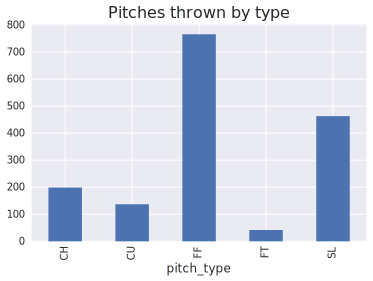

In [273]:
pitch_types.size().plot(kind="bar", title="Pitches thrown by type")

It looks like mostly he relies on a four-seam fastball (FF) and a slider (SL), with some help from a changeup (CH) and a curveball (CU).

How about a histogram of pitch speeds?

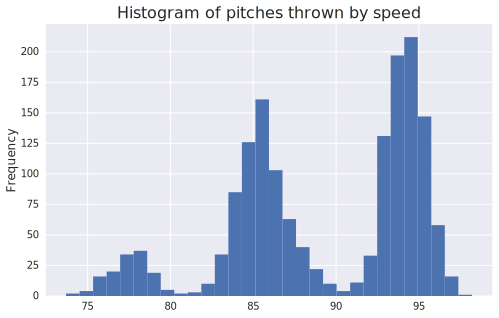

In [274]:
scherzer['release_speed'].plot(kind="hist", 
                               # Number of bins to use
                               bins=30, 
                               # Title of the plot
                               title="Histogram of pitches thrown by speed", 
                               # Size of the plot (x, y)
                               figsize=(8, 5)
                              )

This is kind of a boring chart though. What if we could histogram by speed and type of pitch? 

We can use the "by" argument for that, and get small multiples. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x135202650>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1255ac950>]], dtype=object)

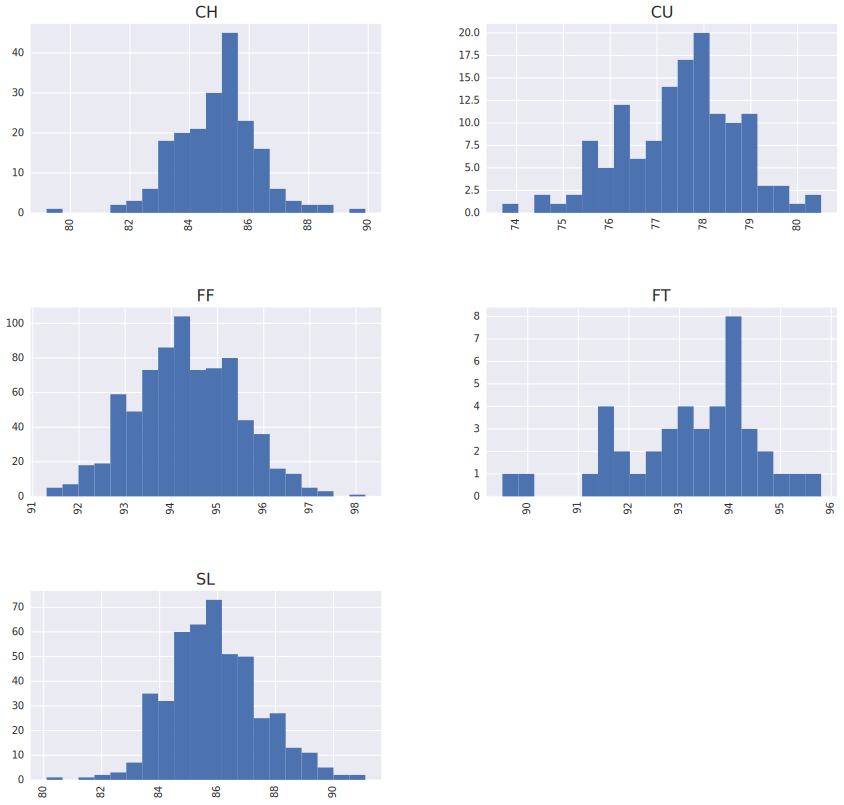

In [249]:
scherzer.hist('release_speed', by='pitch_type', bins=20, figsize=(14, 14))

This isn't great for comparison though, the axes are inconsistent! This is a little better. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x127bb4510>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x127c240d0>]], dtype=object)

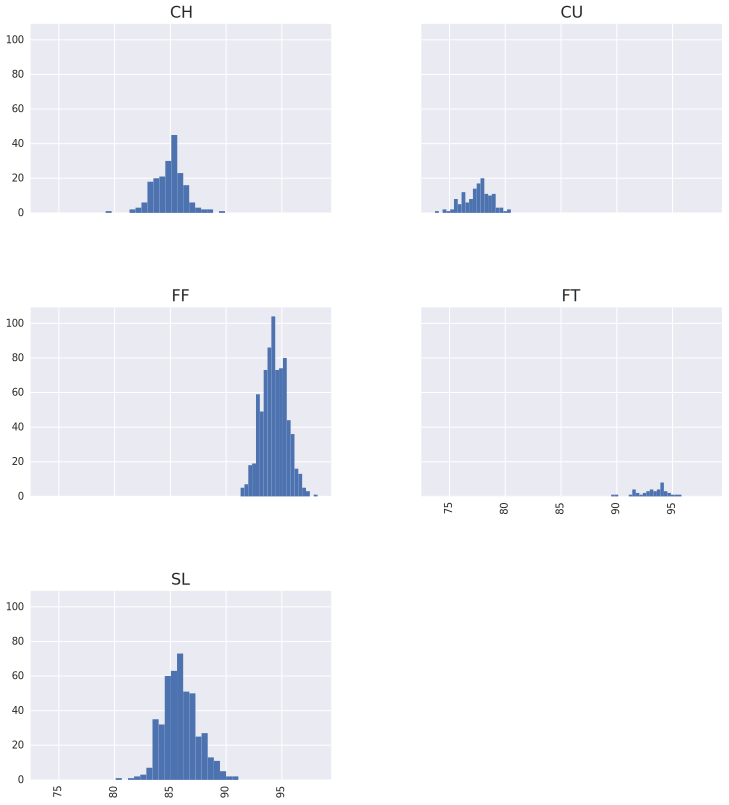

In [286]:
scherzer.hist('release_speed', 
              # Group by query
              by='pitch_type',
              # Number of bins to plot
              bins=20, 
              # Total size of the plot
              figsize=(12, 14),
              # Keep X axis consistent
              sharex=True,
              # Keep y axis consistent
              sharey=True
             )

## Exporting your data

### Exporting as a CSV

Exporting as a CSV is easy. Just call `to_csv()` on any data frame.

In [196]:
scherzer.to_csv('data/scherzer.csv')

### Exporting a chart

Exporting charts is also easy! But requires a bit of config if you want an SVG. 

In [256]:
%config InlineBackend.figure_format = 'svg'

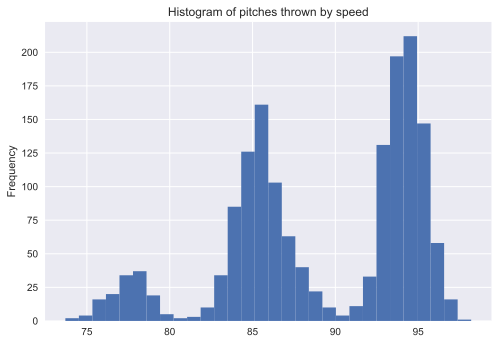

In [200]:
plt.savefig('svg/scherzer_histogram.svg')scherzer['release_speed'].plot(kind="hist", bins=30, title="Histogram of pitches thrown by speed")


## More Customization

There are a number of [customization](http://matplotlib.org/users/customizing.html) options, including font weights, sizes and colors. Try the charting commands again after running this line:

In [254]:
# Uses text characters, ie, not embedding or rendering type as a path 
plt.rcParams['svg.fonttype'] = 'none'

# Defaults to Franklin ITC Std
mpl.rcParams['font.sans-serif'] = ['Franklin ITC Std']

# Font sizes
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 12

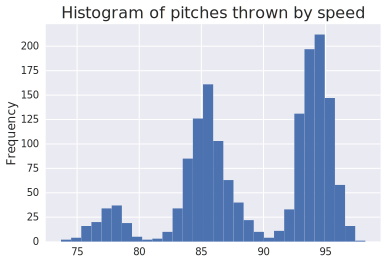

In [287]:
scherzer['release_speed'].plot(kind="hist", bins=30, title="Histogram of pitches thrown by speed")

## Hello maps!

## Useful links

- [California crop production wages analysis](https://github.com/datadesk/california-crop-production-wages-analysis) good example of how to integrate notebooks into the reporting and analysis process. 
- [Sample notebooks from Microsoft Azure](https://notebooks.azure.com/) includes overviews of using Python, R, etc.
- [28 Jupyter Notebook tips, tricks and shortcuts](https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/) 
- [10 Python notebook tutorials for data science and machine learning](http://www.kdnuggets.com/2016/04/top-10-ipython-nb-tutorials.html)
- [More keyboard shortcuts](https://gist.github.com/kidpixo/f4318f8c8143adee5b40) 